# ML Models for Computer Vision Problems

We will be using the dataset provided by the tensorflow package for the demonstration purposes.

You can download it using the method provided in [this notebook](https://www.tensorflow.org/tutorials/load_data/images).

In [4]:
import tensorflow as tf

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [17]:
from random import shuffle

img_width, img_height = 224, 224
num_channels = 3
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
                'data/flower_photos/',
                shuffle=True,
                seed=5,
                validation_split=0.2,
                subset='training',
                image_size=(img_height, img_width),
                batch_size=batch_size)
                
valid_ds = tf.keras.utils.image_dataset_from_directory(
                'data/flower_photos/',
                shuffle=True,
                seed=5,
                validation_split=0.2,
                subset='validation',
                image_size=(img_height, img_width),
                batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [18]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

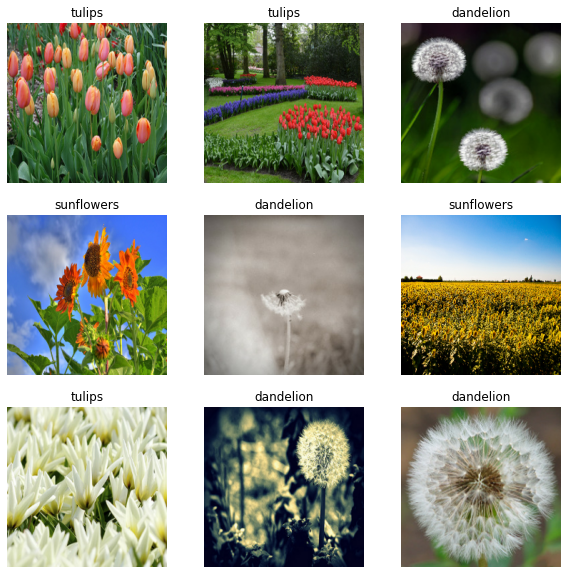

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # Take function returns number of batch size we defined earlier
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [20]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, num_channels)),
    tf.keras.layers.Dense(len(train_ds.class_names))
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/20
92/92 [==============================] - 2s 23ms/step - loss: 4640.7822 - accuracy: 0.3334 - val_loss: 1378.1033 - val_accuracy: 0.3379
Epoch 2/20
92/92 [==============================] - 2s 23ms/step - loss: 2051.3799 - accuracy: 0.4005 - val_loss: 2538.9275 - val_accuracy: 0.4033
Epoch 3/20
92/92 [==============================] - 2s 24ms/step - loss: 1808.3362 - accuracy: 0.4363 - val_loss: 2124.6689 - val_accuracy: 0.3692
Epoch 4/20
92/92 [==============================] - 2s 23ms/step - loss: 1306.7753 - accuracy: 0.4690 - val_loss: 1212.7366 - val_accuracy: 0.4305
Epoch 5/20
92/92 [==============================] - 2s 23ms/step - loss: 1249.2008 - accuracy: 0.4990 - val_loss: 1429.7013 - val_accuracy: 0.4292
Epoch 6/20
92/92 [==============================] - 2s 24ms/step - loss: 1666.9312 - accuracy: 0.4966 - val_loss: 1309.9852 - val_accuracy: 0.4183
Epoch 7/20
92/92 [==============================] - 2s 23ms/step - loss: 904.7077 - accuracy: 0.5637 - val_loss: 1483.

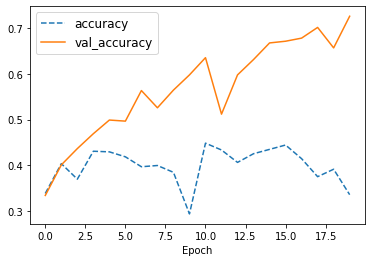

In [24]:
plt.plot(history.history['val_accuracy'], ls='dashed')
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], fontsize=12)

In [25]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.0001)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, num_channels)),
    tf.keras.layers.Dense(1024, activation='softmax', kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(scale=False, center=False),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(len(train_ds.class_names))
])

model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [26]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 1024)              154141696 
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             2048      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 5)                 2565      
                                                      

In [ ]:
history = model1.fit(train_ds, validation_data=valid_ds, epochs=10)
plt.plot(history.history['val_accuracy'], ls='dashed')
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], fontsize=12)